In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clean_data.csv to clean_data.csv


In [ ]:
import pandas as pd
data = pd.read_csv("clean_data.csv")
feature = ['tempmax', 'tempmin', 'temp', 'humidity', 'winddir', 'cloudcover', 'sealevelpressure']

In [ ]:
pip install wandb

In [ ]:
# Log in to your W&B account
import wandb
import random
import math

In [ ]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import math
import pandas as pd
import random
from collections import Counter

# Hàm tính khoảng cách Euclidean giữa 2 điểm
def euclidean_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

# Hàm dự đoán nhãn dựa vào KNN
def predict(X_train, y_train, test_point, k):
    distances = []
    # Tính khoảng cách từ test_point đến tất cả các điểm trong X_train
    for i in range(len(X_train)):
        distance = euclidean_distance(X_train[i], test_point)
        distances.append((distance, y_train[i]))

    # Sắp xếp theo khoảng cách tăng dần và lấy k điểm gần nhất
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = [label for _, label in distances[:k]]

    # Đếm số lượng nhãn trong k hàng xóm gần nhất
    most_common = Counter(k_nearest_neighbors).most_common(1)
    return most_common[0][0]  # Nhãn xuất hiện nhiều nhất

# Hàm KNN cho toàn bộ tập dữ liệu kiểm tra
def knn(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        prediction = predict(X_train, y_train, test_point, k)
        y_pred.append(prediction)
    return y_pred

# Hàm tính độ chính xác
def accuracy(y_true, y_pred):
    correct = sum([1 for true, pred in zip(y_true, y_pred) if true == pred])
    return correct / len(y_true)

# Chia dữ liệu ngẫu nhiên
def split_data(X, y, train_size=0.8):
    # Tạo các chỉ số cho X và y
    data = list(zip(X, y))
    random.shuffle(data)  # Xáo trộn dữ liệu
    split_idx = int(len(data) * train_size)  # Tính chỉ số chia
    train_data = data[:split_idx]
    test_data = data[split_idx:]

    # Tách X và y từ các phần tử trong train_data và test_data
    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)

    return list(X_train), list(y_train), list(X_test), list(y_test)

# Đọc dữ liệu và chuẩn bị tập dữ liệu
data = pd.read_csv("clean_data.csv")
features = ['tempmax', 'tempmin', 'temp', 'humidity', 'winddir', 'cloudcover', 'sealevelpressure']
X = data[features].dropna().values  # Tập dữ liệu đầu vào
y = data['preciptype'].dropna().values  # Nhãn đầu ra

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, y_train, X_test, y_test = split_data(X, y)

# Huấn luyện và dự đoán với k tăng dần sau mỗi vòng lặp
k_start = 55
k_max = 55
for k in range(k_start, k_max + 1, 5):  # k bắt đầu từ k_start, tăng dần đến k_max vởi step=5
    # Khởi tạo W&B cho từng giá trị k
    wandb.init(
        project="knn-rain-prediction",
        name=f"KNN2_k={k}",
        config={
            "k": k,
            "train_size": len(X_train),
            "test_size": len(X_test),
            "features": features,
            "distance_metric": "euclidean"
        }
    )

    # Huấn luyện và dự đoán
    y_pred = knn(X_train, y_train, X_test, k)

    # Đánh giá mô hình và log kết quả
    acc = accuracy(y_test, y_pred)
    wandb.log({
        "accuracy": acc,
        "k": k,
        "train_size": len(X_train),
        "test_size": len(X_test)
    })

    # In kết quả
    print(f"k = {k}")
    print(f"Số mẫu dữ liệu để huấn luyện: {len(X_train)}")
    print(f"Số mẫu dữ liệu để kiểm tra: {len(X_test)}")
    print(f"Độ chính xác của mô hình: {acc:.2f}")

    # Kết thúc W&B cho run hiện tại
    wandb.finish()

k = 55
Số mẫu dữ liệu để huấn luyện: 9935
Số mẫu dữ liệu để kiểm tra: 2484
Độ chính xác của mô hình: 0.68


accuracy,▁
k,▁
test_size,▁
train_size,▁
accuracy,0.67955
k,55
test_size,2484
train_size,9935


Độ chính xác: 67.95%




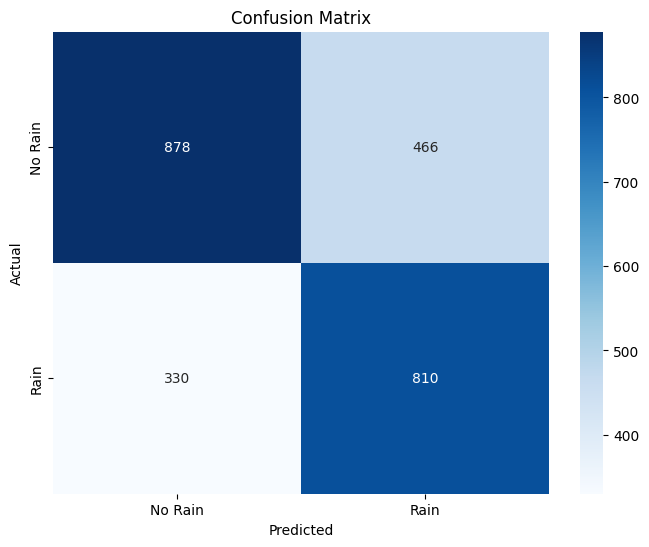


Accuracy Score: 0.68 *


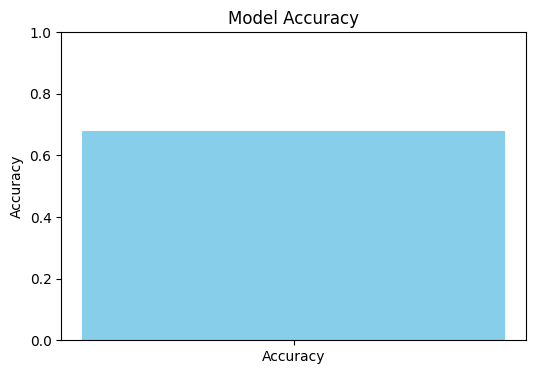

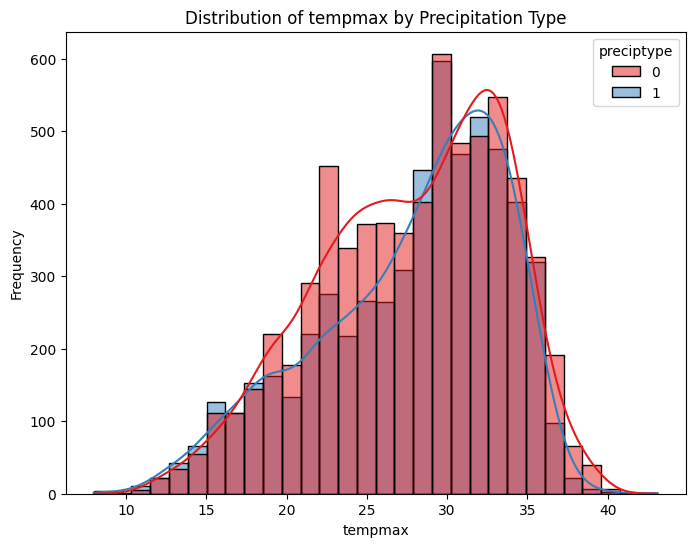

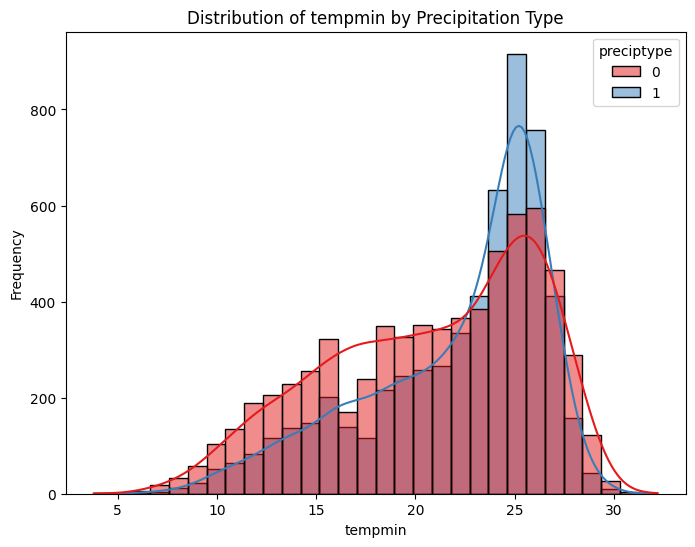

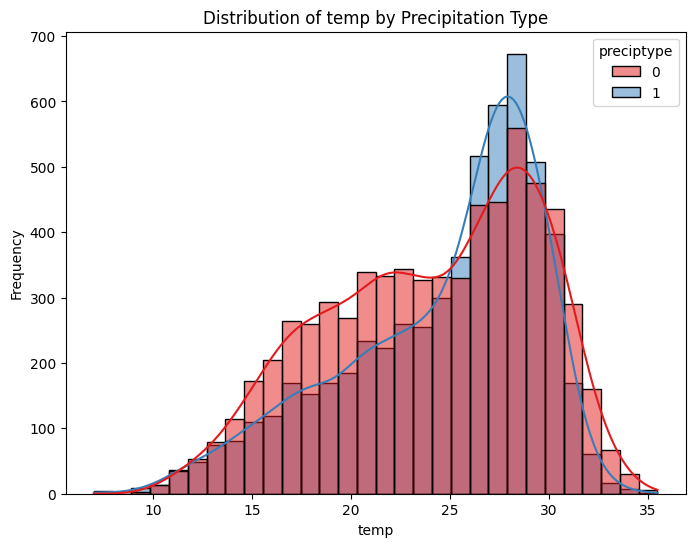

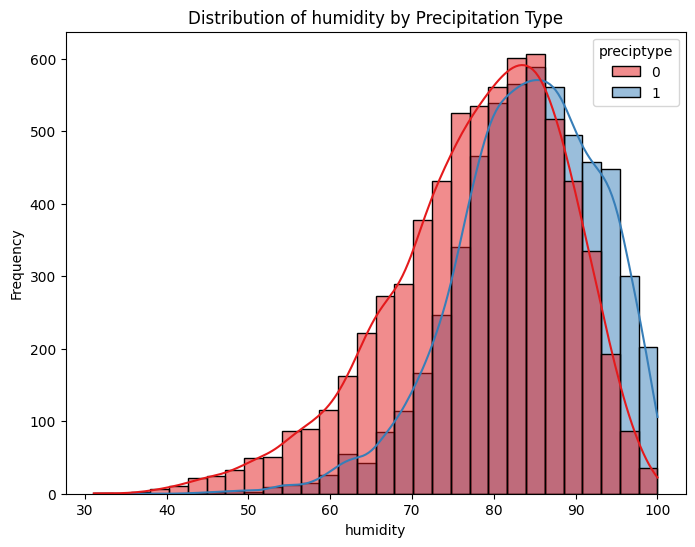

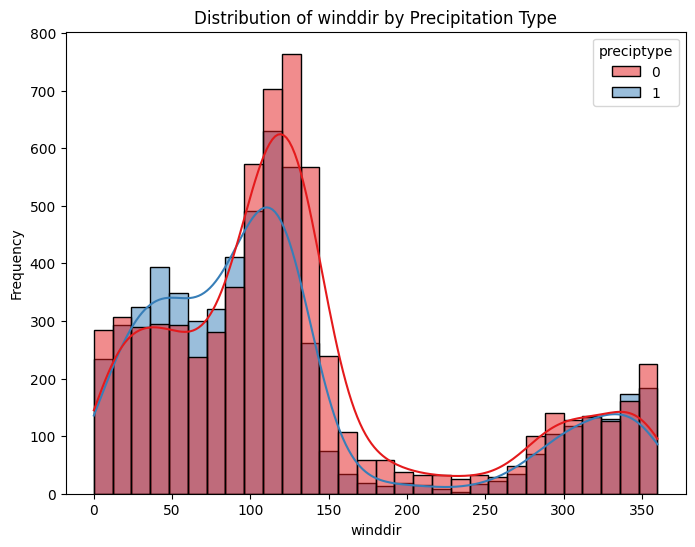

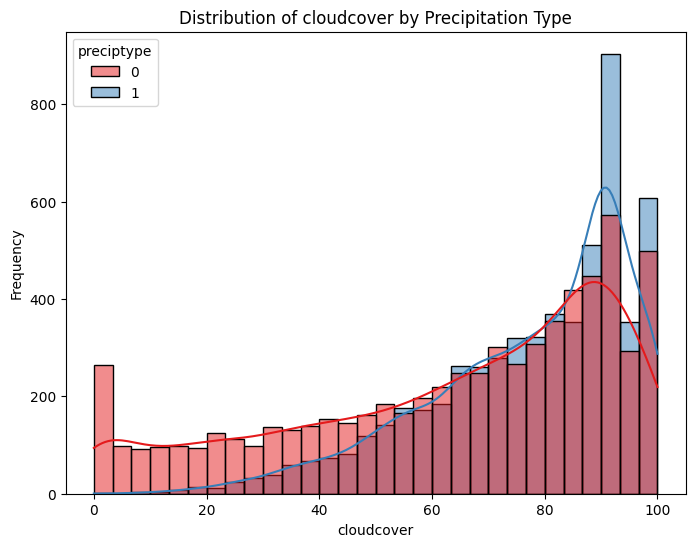

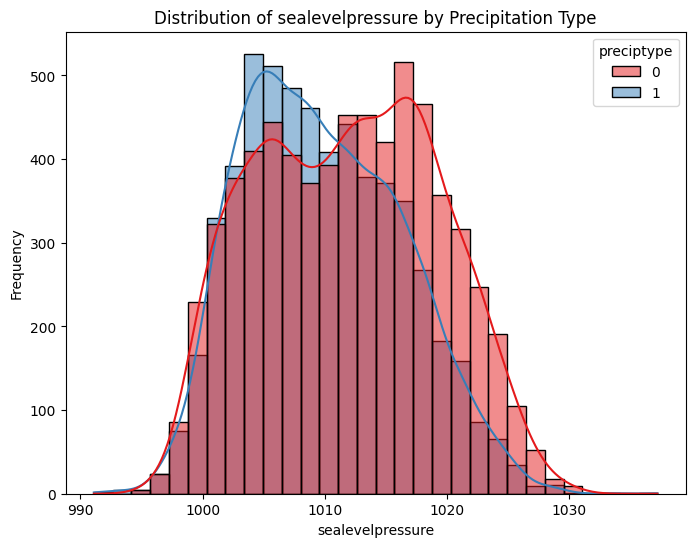

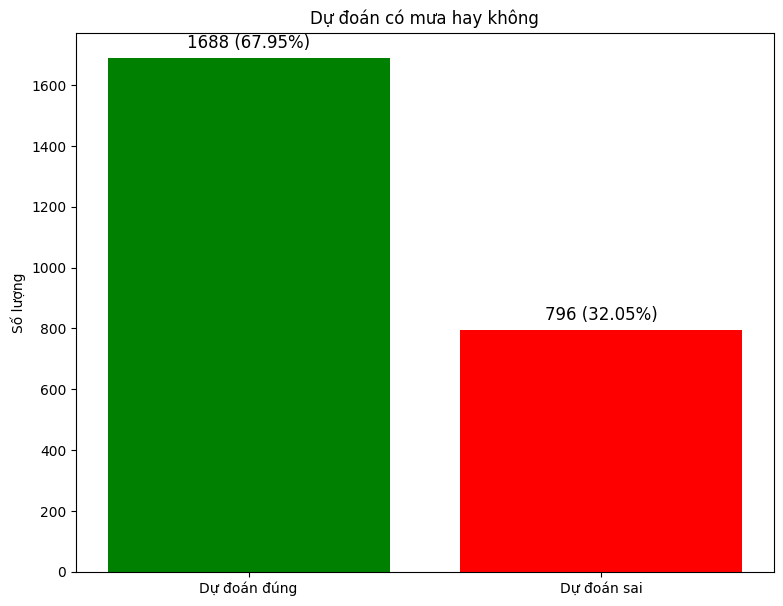

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print(f"Độ chính xác: {acc:.2%}\n\n")

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()


# Biểu đồ độ chính xác
print(f"Accuracy Score: {acc:.2f} *")

# Vẽ độ chính xác với matplotlib
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [acc], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Biểu đồ phân phối các đặc trưng
for feature in features:
  plt.figure(figsize=(8, 6))
  sns.histplot(data=data, x=feature, hue='preciptype', kde=True, bins=30, palette='Set1')
  plt.title(f"Distribution of {feature} by Precipitation Type")
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()


# Biểu đồ cột
# Tính số lượng dự đoán đúng và sai
correct_predictions = sum([1 for true, pred in zip(y_test, y_pred) if true == pred])
incorrect_predictions = len(y_test) - correct_predictions

# Dữ liệu cho biểu đồ
labels = ['Dự đoán đúng', 'Dự đoán sai']
values = [correct_predictions, incorrect_predictions]

# Tính tỷ lệ phần trăm
total = len(y_test)
correct_percentage = (correct_predictions / total) * 100
incorrect_percentage = (incorrect_predictions / total) * 100

# Vẽ biểu đồ hình cột
plt.figure(figsize=(9, 7))
bars = plt.bar(labels, values, color=['green', 'red'])

# Thêm số lượng và phần trăm ở trên mỗi cột
for bar, value, percentage in zip(bars, values, [correct_percentage, incorrect_percentage]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, f"{height} ({percentage:.2f}%)",
             ha='center', va='bottom', fontsize=12)

# Thêm tiêu đề và nhãn cho các trục
plt.title('Dự đoán có mưa hay không')
plt.ylabel('Số lượng')
plt.show()